## Importações:

In [1]:
import numpy as np
import random as rd
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import matplotlib.animation as animation
from itertools import combinations
from scipy.optimize import curve_fit
#from scipy.interpolate import interp1d
plt.style.use('seaborn-bright')
import pandas as pd
import math

In [2]:
from funcoes_paredes import Particula, mudar_passo, gerar_particulas_dois_sistemas, simular_reacao, exponencial

# Simulando o sistema:

## Parâmetros da simulação:

In [3]:
#Parâmetros da simulação:

numero_particulas = 300
tamanho_caixa = 50
RAIO = 0.5
MASSA = 1
probabilidade_reacao = 0.4
tipo = 'atomo'

tempo_final = 50
numero_passos = 400
tempo_cada_passo = tempo_final/numero_passos

## Simulação da reação química:

def gerar_particulas_sistemas_separados(N, raio, massa, tamanho_caixa, tipo, num_sistemas):
    """Generate N Particle objects in separate lists for different systems."""
    sistemas_particulas = {i: [] for i in range(1, num_sistemas + 1)}  # Dicionário para armazenar partículas de cada sistema

    for i in range(N):
        magnitude_velocidade = np.random.rand(1) * 25
        angulo_velocidade = np.random.rand(1) * 2 * np.pi
        v = np.append(magnitude_velocidade * np.cos(angulo_velocidade), magnitude_velocidade * np.sin(angulo_velocidade))

        colisao = True
        while colisao:
            colisao = False
            pos = raio + np.random.rand(2) * (tamanho_caixa - 2 * raio)
            nova_particula = Particula(massa, raio, pos, v, tipo)

            # Verificar colisões com todas as partículas em todos os sistemas
            for sistema, particulas_sistema in sistemas_particulas.items():
                for particula_sistema in particulas_sistema:
                    if nova_particula.checar_colisão(particula_sistema):
                        colisao = True
                        break
                if colisao:
                    break

            # Se não houver colisões, adicionar a partícula ao sistema correspondente
            if not colisao:
                sistema_destino = i % num_sistemas + 1  # Calcula o sistema de destino usando o operador de módulo
                sistemas_particulas[sistema_destino].append(nova_particula)

    return sistemas_particulas


num_sistemas = 5  # Defina o número de sistemas desejado
particulas_por_sistema = gerar_particulas_sistemas_separados(numero_particulas, RAIO, MASSA, tamanho_caixa, tipo, num_sistemas)

#print(particulas_por_sistema)
# Iterar por todos os sistemas e suas partículas
for sistema, particulas_sistema in particulas_por_sistema.items():
    print(f"Sistema {sistema}: {len(particulas_sistema)} partículas")
    #for particula in particulas_sistema:
     #   print(particula)  # Ou qualquer outra ação que você deseje fazer com a partícula


nova_lista = []
for key in particulas_por_sistema.keys():
    nova_lista.append(particulas_por_sistema[key])
    
lista_particulas_sistema1, lista_particulas_sistema2, lista_particulas_sistema3, lista_particulas_sistema4, lista_particulas_sistema5 = nova_lista


#if len(nova_lista) == 5:  # Se você souber que são 3 listas
 #   lista_particulas_sistema1, lista2, lista3, lista4, lista5 = nova_lista

    # Agora você pode usar as variáveis lista1, lista2 e lista3 individualmente
print(len(lista_particulas_sistema1))
  

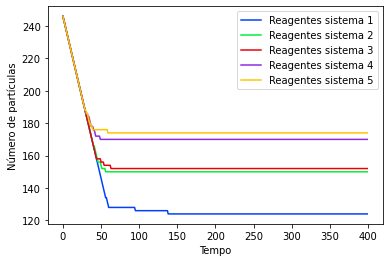

In [4]:
lista_particulas_sistema1, lista_particulas_sistema2, lista_particulas_sistema3, lista_particulas_sistema4, lista_particulas_sistema5 = gerar_particulas_dois_sistemas(numero_particulas, RAIO, MASSA, tamanho_caixa, tipo)

lista_reagentes_sistema1, lista_produtos_sistema1 = [], []
lista_reagentes_sistema2, lista_produtos_sistema2 = [], []
lista_reagentes_sistema3, lista_produtos_sistema3 = [], []
lista_reagentes_sistema4, lista_produtos_sistema4 = [], []
lista_reagentes_sistema5, lista_produtos_sistema5 = [], []

# Compute simulation (It takes some time if numero_passos and numero_particulas are large)
for i in range(numero_passos):
    
    # Simular colisões
    simular_reacao(lista_particulas_sistema1, probabilidade_reacao, tempo_cada_passo)

    # Atualizar posições e velocidades
    mudar_passo(lista_particulas_sistema1, tempo_cada_passo, tamanho_caixa, probabilidade_reacao)
    
    a_count, m_count = 0, 0
    
    for particula in lista_particulas_sistema1:
        if particula.tipo == 'atomo':
            a_count += 1
        else:
            m_count += 1
    
    lista_reagentes_sistema1.append(a_count)
    lista_produtos_sistema1.append(m_count)
    
    # Simular colisões para o sistema 2
    simular_reacao(lista_particulas_sistema2, probabilidade_reacao, tempo_cada_passo)
    # Atualizar posições e velocidades para o sistema 2
    mudar_passo(lista_particulas_sistema2, tempo_cada_passo, tamanho_caixa, probabilidade_reacao)
    
    a_count, m_count = 0, 0
    for particula in lista_particulas_sistema2:
        if particula.tipo == 'atomo':
            a_count += 1
        else:
            m_count += 1
    lista_reagentes_sistema2.append(a_count)
    lista_produtos_sistema2.append(m_count)
    
    
    # Simular colisões para o sistema 3
    simular_reacao(lista_particulas_sistema3, probabilidade_reacao, tempo_cada_passo)

    # Atualizar posições e velocidades
    mudar_passo(lista_particulas_sistema3, tempo_cada_passo, tamanho_caixa, probabilidade_reacao)
    
    a_count, m_count = 0, 0
    
    for particula in lista_particulas_sistema3:
        if particula.tipo == 'atomo':
            a_count += 1
        else:
            m_count += 1
    
    lista_reagentes_sistema3.append(a_count)
    lista_produtos_sistema3.append(m_count)
    
    simular_reacao(lista_particulas_sistema4, probabilidade_reacao, tempo_cada_passo)
    # Atualizar posições e velocidades para o sistema 4
    mudar_passo(lista_particulas_sistema4, tempo_cada_passo, tamanho_caixa, probabilidade_reacao)
    
    a_count, m_count = 0, 0
    for particula in lista_particulas_sistema4:
        if particula.tipo == 'atomo':
            a_count += 1
        else:
            m_count += 1
    lista_reagentes_sistema4.append(a_count)
    lista_produtos_sistema4.append(m_count)
    
    # Simular colisões para o sistema 5
    simular_reacao(lista_particulas_sistema5, probabilidade_reacao, tempo_cada_passo)

    # Atualizar posições e velocidades
    mudar_passo(lista_particulas_sistema5, tempo_cada_passo, tamanho_caixa, probabilidade_reacao)
    
    a_count, m_count = 0, 0
    
    for particula in lista_particulas_sistema5:
        if particula.tipo == 'atomo':
            a_count += 1
        else:
            m_count += 1
    
    lista_reagentes_sistema5.append(a_count)
    lista_produtos_sistema5.append(m_count)
    

plt.plot(list(range(numero_passos)),lista_reagentes_sistema1,label='Reagentes sistema 1')
plt.plot(list(range(numero_passos)),lista_reagentes_sistema2,label='Reagentes sistema 2')
plt.plot(list(range(numero_passos)),lista_reagentes_sistema3,label='Reagentes sistema 3')
plt.plot(list(range(numero_passos)),lista_reagentes_sistema4,label='Reagentes sistema 4')
plt.plot(list(range(numero_passos)),lista_reagentes_sistema5,label='Reagentes sistema 5')

#plt.plot(list(range(numero_passos)),lista_produtos_sistema1,label='Reagentes sistema 1')
#plt.plot(list(range(numero_passos)),lista_produtos_sistema2,label='Reagentes sistema 2')
#plt.plot(list(range(numero_passos)),lista_produtos_sistema3,label='Reagentes sistema 3')
#plt.plot(list(range(numero_passos)),lista_produtos_sistema4,label='Reagentes sistema 4')
#plt.plot(list(range(numero_passos)),lista_produtos_sistema5,label='Reagentes sistema 5')
plt.xlabel('Tempo')
plt.ylabel('Número de partículas')

plt.legend()
#plt.xlim(0, 50)  # Define os limites do eixo x de 0 a 100
plt.savefig('simulação_temperatura.png')
plt.show()

## Dataframe:

In [5]:
lista = {'Reagentes sistema 1': lista_reagentes_sistema1, 'Reagentes sistema 2': lista_reagentes_sistema2, 'Reagentes sistema 3': lista_reagentes_sistema3, 'Reagentes sistema 4': lista_reagentes_sistema4, 'Reagentes sistema 5': lista_reagentes_sistema5, 'tempo': range(numero_passos)}

print(len(lista_reagentes_sistema1))
print(len(lista_reagentes_sistema1))
print(len(range(numero_passos)))


df = pd.DataFrame(lista)

sistema1_df = df['Reagentes sistema 1'] #df.iloc[0 : 70, 0]
sistema2_df = df['Reagentes sistema 2'] #df.iloc[0 : 70, 0]
sistema3_df = df['Reagentes sistema 3'] #df.iloc[0 : 70, 0]
sistema4_df = df['Reagentes sistema 4'] #df.iloc[0 : 70, 0]
sistema5_df = df['Reagentes sistema 5'] #df.iloc[0 : 70, 0]

temporeacao = df['tempo'] #df.iloc[0:70, 2]

df.to_csv('meu_dataframe_sem_catalisador.csv', index=False)


400
400
400


## Coeficiente k:

k = 0.03285088083744132
k = 0.04264874574884789
k = 0.043315230916293725
k = 0.05198611628344428
k = 0.0551912995160168


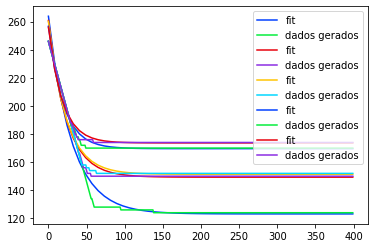

In [6]:
import lmfit

def fit(x, k, C, D):
    return C*np.exp(-k*x) + D

taxas = []

for sistema_df in [sistema1_df, sistema2_df, sistema3_df, sistema4_df, sistema5_df]:
    
    funcao_fit_model=lmfit.Model(fit)
    funcao_fit_model.set_param_hint('D',value=30, vary=True)
    funcao_fit_model.set_param_hint('C',value=150, vary=True)
    funcao_fit_model.set_param_hint('k',value=.05, vary=True)

    param = funcao_fit_model.make_params()
    results = funcao_fit_model.fit(sistema_df, x = temporeacao, params = param)
    k = results.params['k'].value
    D = results.params['D'].value
    C = results.params['C'].value
    
    x_fit = np.linspace(0, max(temporeacao))
    y_fit = fit(x_fit, k, C, D)
    
    taxas.append(k)
    
    print('k =',k)
    plt.plot(x_fit,y_fit,label='fit')
    plt.plot(temporeacao,sistema_df,label='dados gerados')
    plt.legend()
plt.show()

In [7]:
print(k)

0.0551912995160168


# Análise do efeito da Temperatura no sistema:

## Obtendo a temperatura através da simulação:
Sim, você pode obter a temperatura a partir da distribuição de velocidades de Maxwell-Boltzmann. Esta distribuição descreve a probabilidade de uma partícula ter uma determinada velocidade em um gás ideal à temperatura \(T\).

A relação entre a temperatura \(T\) e a distribuição de velocidades de Maxwell-Boltzmann é dada pela equação:

$ \langle v^2 \rangle = \frac{3 k_B T}{m} $

Onde:
- $\langle v^2 \rangle$ é o valor médio da velocidade ao quadrado.
- \(k_B\) é a constante de Boltzmann $(1.380649 \times 10^{-23} \, \text{J/K}$.
- \(T\) é a temperatura em Kelvin.
- \(m\) é a massa da partícula.

Se você tiver a média das velocidades ao quadrado das partículas em sua simulação, você pode usar essa equação para encontrar a temperatura correspondente.

Por exemplo, se você tem a média das velocidades ao quadrado $\langle v^2 \rangle$ e a massa das partículas, você pode calcular a temperatura usando:

$ T = \frac{m \langle v^2 \rangle N}{3 k_B} $

In [8]:
def calcular_temperatura(lista_particulas, massa):
    """
    Calcula uma estimativa da temperatura do sistema com base na distribuição de Maxwell-Boltzmann das velocidades.

    Args:
        lista_particulas (list): Uma lista de objetos que contêm informações sobre as partículas.
            Cada objeto deve ter um atributo 'velocidade' que represente a velocidade da partícula como um vetor.
        massa (float): A massa das partículas em unidades apropriadas (por exemplo, kg).

    Returns:
        float: A temperatura estimada em Kelvin.

    Note:
        Esta estimativa assume que as velocidades das partículas seguem a distribuição de Maxwell-Boltzmann
        e que o sistema se comporta como um gás ideal.
    """
    v_quadrado_medio = 0
    
    for particula in lista_particulas:
        v_quadrado_medio += np.dot(particula.velocidade, particula.velocidade)
            
    v_quadrado_medio /= len(lista_particulas)
    
    kB = 1.380649e-23   # Constante de Boltzmann em J/K #aproximação
    temperatura = (massa * v_quadrado_medio) * numero_particulas / (3 * kB)
    
    return temperatura

O código retorna a temperatura estimada de um sistema de partículas com base nas velocidades dessas partículas, assumindo que as velocidades seguem a distribuição de Maxwell-Boltzmann.

O parâmetro `lista_particulas` deve ser uma lista de objetos que contêm informações sobre as partículas. Cada objeto deve ter um atributo chamado `velocidade`, que representa a velocidade da partícula como um vetor.

A função calcula a média das velocidades ao quadrado de todas as partículas e usa essa média para estimar a temperatura do sistema. Lembre-se de que esta é uma estimativa e assume que o sistema se comporta como um gás ideal.

Para calcular a temperatura de uma partícula específica em vez da temperatura média do sistema, teria que considerar apenas a velocidade da partícula em questão.

Então para a gente obter temperaturas diferentes e inserir na equação de Arrhenius, vamos ter que usar a função `calcular_temperatura` em dois sistemas diferentes.

## Simulando sistemas diferentes:
Vamos ter que simular, pegar a lista de valores para calcular a temp e fitar para obter k.
As velocidades dos sistemas são geradas de forma aleatória dentro de `gerar_particulas()`, para gerar esses dois sistemas com velocidades diferentes

#### Massa:
Para o átomo de hidrogênio, que tem uma massa atômica de aproximadamente 1.00784 u (unidades de massa atômica), podemos converter isso para gramas por mol (g/mol) e, em seguida, para quilogramas por mol (kg/mol).

A conversão é feita da seguinte forma:

1. Massa atômica em g/mol:
$M_{\text{H}} = 1.00784 \, \text{u} \times 1 \, \text{g/mol/u} \approx 1.00784 \, \text{g/mol}$

2. Massa atômica em kg/mol:
$m_{\text{H}} = M_{\text{H}} \times 10^{-3} \times N_A \approx 1.00784 \times 10^{-3} \, \text{kg/mol} \times 6.02214076 \times 10^{23} \, \text{mol}^{-1} \approx 1.00784 \times 10^{-26} \, \text{kg/mol}$

Portanto, para o átomo de hidrogênio, a massa molecular é aproximadamente \($1 \times 10^{-26}$\) kg/mol. Se você deseja usar isso na equação de Arrhenius, certifique-se de expressar a energia de ativação (\($E_a$\)) em joules (J) por mol.


### Temperaturas:

In [9]:
# Supondo que a reação seja de H? Massa unitária 
massa_particula = 1*10**(-26)  # Em kg/mol

# Calcular a temperatura
temperatura_sistema1 = calcular_temperatura(lista_particulas_sistema1, massa_particula)
temperatura_sistema2 = calcular_temperatura(lista_particulas_sistema2, massa_particula)
temperatura_sistema3 = calcular_temperatura(lista_particulas_sistema3, massa_particula)
temperatura_sistema4 = calcular_temperatura(lista_particulas_sistema4, massa_particula)
temperatura_sistema5 = calcular_temperatura(lista_particulas_sistema5, massa_particula)


print(f"A temperatura estimada para o sistema 1 é aproximadamente {temperatura_sistema1:.2f} K.")
print(f"A temperatura estimada para o sistema 2 é aproximadamente {temperatura_sistema2:.2f} K.")
print(f"A temperatura estimada para o sistema 3 é aproximadamente {temperatura_sistema3:.2f} K.")
print(f"A temperatura estimada para o sistema 4 é aproximadamente {temperatura_sistema4:.2f} K.")
print(f"A temperatura estimada para o sistema 5 é aproximadamente {temperatura_sistema5:.2f} K.")

temperaturas_arrhenius = [temperatura_sistema1, temperatura_sistema2, temperatura_sistema3, temperatura_sistema4, temperatura_sistema5] #tem que transformar em array?

A temperatura estimada para o sistema 1 é aproximadamente 11.78 K.
A temperatura estimada para o sistema 2 é aproximadamente 57.67 K.
A temperatura estimada para o sistema 3 é aproximadamente 127.63 K.
A temperatura estimada para o sistema 4 é aproximadamente 237.81 K.
A temperatura estimada para o sistema 5 é aproximadamente 372.81 K.


In [10]:
from sklearn.linear_model import LinearRegression

No handles with labels found to put in legend.


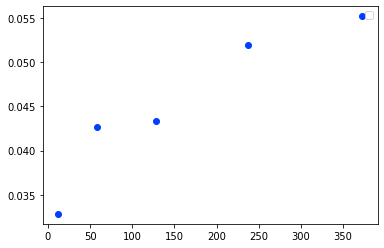

In [11]:
#k em função da temperatura

plt.scatter(temperaturas_arrhenius, taxas)
plt.legend()
plt.show()

In [12]:
model = LinearRegression()
model = LinearRegression().fit(np.array(temperaturas_arrhenius).reshape(-1, 1),taxas)

x_pred = np.linspace(min(temperaturas_arrhenius),max(temperaturas_arrhenius),2)
y_pred = model.predict(x_pred.reshape(-1, 1))

k_list = []
for parametro in parametros_ajustados:
    k_list.append(parametro[1])

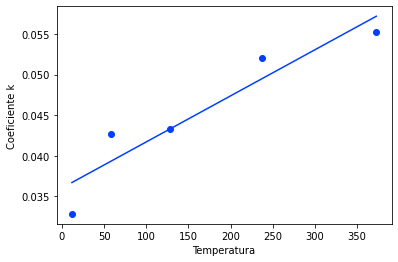

In [13]:
plt.scatter(temperaturas_arrhenius,taxas)
plt.plot(x_pred,y_pred)

plt.xlabel('Temperatura'),plt.ylabel('Coeficiente k')
plt.savefig('temperatura_linear.png')

## Equação de Arrhenius:

Na verdade, eu simulo aumentando a velocidade (que é a mesma coisa que aumentar a temperatura) e pego esses valores e fito para obter a energia de ativação

In [14]:
def arrhenius_eq(T, A, Ea):
    """
    Calcula a constante de taxa (k) utilizando a Lei de Arrhenius.
    
    Args:
        A (float): Fator de pré-exponencial de Arrhenius.
        Ea (float): Energia de ativação em Joules por mol.
        R (float): Constante dos gases ideais em Joules por mol por Kelvin.
        T (float): Temperatura em Kelvin.
        
    Returns:
        float: Constante de taxa (k).
    """
    R = 8.314  # Constante dos gases ideais em J/(mol K)
    
    return A * np.exp(- (Ea / (R * T)))

Fator de pré-exponencial (A): -13.4175485789486
Energia de ativação (Ea): -2.9935585950094104 J/mol


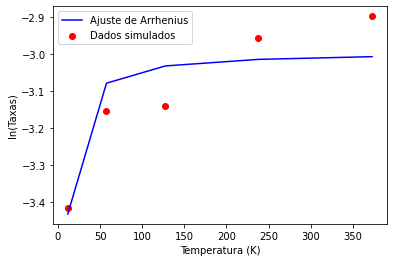

In [15]:
temperaturas_arrhenius = np.array(temperaturas_arrhenius)

# Transformação dos dados
ln_taxas = np.log(taxas)

# Ajuste linear
params, covariance = curve_fit(arrhenius_eq, temperaturas_arrhenius, ln_taxas)
A_fit, Ea_fit = params

# Calcular os valores ajustados
valores_ajustados = arrhenius_eq(temperaturas_arrhenius, A_fit, Ea_fit)

# Imprimir os resultados
print(f"Fator de pré-exponencial (A): {Ea_fit}")
print(f"Energia de ativação (Ea): {A_fit} J/mol")

# Plotar os dados experimentais e a curva ajustada
plt.scatter(temperaturas_arrhenius, ln_taxas, color='red', label='Dados simulados')
plt.plot(temperaturas_arrhenius, valores_ajustados, color='blue', label='Ajuste de Arrhenius')
plt.xlabel('Temperatura (K)')
plt.ylabel('ln(Taxas)')
plt.savefig('Arrhenius temperatura.png')
plt.legend()
plt.show()


# Para um sistema com catalisador:

In [16]:
from funcoes_paredes import Particula, mudar_passo, gerar_particulas_dois_sistemas, simular_reacao, exponencial

## Simulação da reação química com catalisador:

In [17]:
lista_particulas_sistema1_com_catalisador, lista_particulas_sistema2_com_catalisador, lista_particulas_sistema3_com_catalisador, lista_particulas_sistema4_com_catalisador, lista_particulas_sistema5_com_catalisador = gerar_particulas_dois_sistemas(numero_particulas, RAIO, MASSA, tamanho_caixa, tipo)

lista_reagentes_sistema1_com_catalisador, lista_produtos_sistema1_com_catalisador = [], []
lista_reagentes_sistema2_com_catalisador, lista_produtos_sistema2_com_catalisador = [], []
lista_reagentes_sistema3_com_catalisador, lista_produtos_sistema3_com_catalisador = [], []
lista_reagentes_sistema4_com_catalisador, lista_produtos_sistema4_com_catalisador = [], []
lista_reagentes_sistema5_com_catalisador, lista_produtos_sistema5_com_catalisador = [], []

# Compute simulation (It takes some time if numero_passos and numero_particulas are large)
for i in range(numero_passos):
    
    # Simular colisões
    simular_reacao(lista_particulas_sistema1_com_catalisador, probabilidade_reacao)

    # Atualizar posições e velocidades
    mudar_passo(lista_particulas_sistema1_com_catalisador, tempo_cada_passo, tamanho_caixa, probabilidade_reacao)
    
    a_count, m_count = 0, 0
    
    for particula in lista_particulas_sistema1_com_catalisador:
        if particula.tipo == 'atomo':
            a_count += 1
        else:
            m_count += 1
    
    lista_reagentes_sistema1_com_catalisador.append(a_count)
    lista_produtos_sistema1_com_catalisador.append(m_count)
    
    # Simular colisões para o sistema 2
    simular_reacao(lista_particulas_sistema2_com_catalisador, probabilidade_reacao)
    # Atualizar posições e velocidades para o sistema 2
    mudar_passo(lista_particulas_sistema2_com_catalisador, tempo_cada_passo, tamanho_caixa, probabilidade_reacao)
    
    a_count, m_count = 0, 0
    for particula in lista_particulas_sistema2_com_catalisador:
        if particula.tipo == 'atomo':
            a_count += 1
        else:
            m_count += 1
    lista_reagentes_sistema2_com_catalisador.append(a_count)
    lista_produtos_sistema2_com_catalisador.append(m_count)
    
    
    # Simular colisões para o sistema 3
    simular_reacao(lista_particulas_sistema3_com_catalisador, probabilidade_reacao)

    # Atualizar posições e velocidades
    mudar_passo(lista_particulas_sistema3_com_catalisador, tempo_cada_passo, tamanho_caixa, probabilidade_reacao)
    
    a_count, m_count = 0, 0
    
    for particula in lista_particulas_sistema3_com_catalisador:
        if particula.tipo == 'atomo':
            a_count += 1
        else:
            m_count += 1
    
    lista_reagentes_sistema3_com_catalisador.append(a_count)
    lista_produtos_sistema3_com_catalisador.append(m_count)
    
    simular_reacao(lista_particulas_sistema4_com_catalisador, probabilidade_reacao)
    # Atualizar posições e velocidades para o sistema 4
    mudar_passo(lista_particulas_sistema4_com_catalisador, tempo_cada_passo, tamanho_caixa, probabilidade_reacao)
    
    a_count, m_count = 0, 0
    for particula in lista_particulas_sistema4_com_catalisador:
        if particula.tipo == 'atomo':
            a_count += 1
        else:
            m_count += 1
    lista_reagentes_sistema4_com_catalisador.append(a_count)
    lista_produtos_sistema4_com_catalisador.append(m_count)
    
    # Simular colisões para o sistema 5
    simular_reacao(lista_particulas_sistema5_com_catalisador, probabilidade_reacao)

    # Atualizar posições e velocidades
    mudar_passo(lista_particulas_sistema5_com_catalisador, tempo_cada_passo, tamanho_caixa, probabilidade_reacao)
    
    a_count, m_count = 0, 0
    
    for particula in lista_particulas_sistema5_com_catalisador:
        if particula.tipo == 'atomo':
            a_count += 1
        else:
            m_count += 1
    
    lista_reagentes_sistema5_com_catalisador.append(a_count)
    lista_produtos_sistema5_com_catalisador.append(m_count)
    

plt.plot(list(range(numero_passos)),lista_reagentes_sistema1_com_catalisador,label='Reagentes sistema 1 com catalisador', marker = '*')
plt.plot(list(range(numero_passos)),lista_reagentes_sistema2_com_catalisador,label='Reagentes sistema 2 com catalisador', marker = '*')
plt.plot(list(range(numero_passos)),lista_reagentes_sistema3_com_catalisador,label='Reagentes sistema 3 com catalisador', marker = '*')
plt.plot(list(range(numero_passos)),lista_reagentes_sistema4_com_catalisador,label='Reagentes sistema 4 com catalisador', marker = '*')
plt.plot(list(range(numero_passos)),lista_reagentes_sistema5_com_catalisador,label='Reagentes sistema 5 com catalisador', marker = '*')

plt.plot(list(range(numero_passos)),lista_produtos_sistema1_com_catalisador,label='Produtos sistema 1 com catalisador', marker = '*')
plt.plot(list(range(numero_passos)),lista_produtos_sistema2_com_catalisador,label='Produtos sistema 2 com catalisador', marker = '*')
plt.plot(list(range(numero_passos)),lista_produtos_sistema3_com_catalisador,label='Produtos sistema 3 com catalisador', marker = '*')
plt.plot(list(range(numero_passos)),lista_produtos_sistema4_com_catalisador,label='Produtos sistema 4 com catalisador', marker = '*')
plt.plot(list(range(numero_passos)),lista_produtos_sistema5_com_catalisador,label='Produtos sistema 5 com catalisador', marker = '*')

plt.xlabel('Tempo')
plt.ylabel('Número de partículas')

plt.legend()
plt.xlim(0, 50)  # Define os limites do eixo x de 0 a 100
plt.savefig('Simulação_reagentes_doissistemas.png')
plt.show()

TypeError: simular_reacao() missing 1 required positional argument: 'passo'

In [ ]:
lista = {'Reagentes sistema 1 com catalisador': lista_reagentes_sistema1_com_catalisador, 'Reagentes sistema 2 com catalisador': lista_reagentes_sistema2_com_catalisador, 'Reagentes sistema 3 com catalisador': lista_reagentes_sistema3_com_catalisador, 'Reagentes sistema 4 com catalisador': lista_reagentes_sistema4_com_catalisador, 'Reagentes sistema 5 com catalisador': lista_reagentes_sistema5_com_catalisador, 'tempo': range(numero_passos)}

df_com_catalisador = pd.DataFrame(lista)

sistema1_df_com_catalisador = df_com_catalisador['Reagentes sistema 1 com catalisador'] #df.iloc[0 : 70, 0]
sistema2_df_com_catalisador = df_com_catalisador['Reagentes sistema 2 com catalisador'] #df.iloc[0 : 70, 0]
sistema3_df_com_catalisador = df_com_catalisador['Reagentes sistema 3 com catalisador'] #df.iloc[0 : 70, 0]
sistema4_df_com_catalisador = df_com_catalisador['Reagentes sistema 4 com catalisador'] #df.iloc[0 : 70, 0]
sistema5_df_com_catalisador = df_com_catalisador['Reagentes sistema 5 com catalisador'] #df.iloc[0 : 70, 0]

temporeacao = df_com_catalisador['tempo'] #df.iloc[0:70, 2]

df.to_csv('meu_dataframe_com_catalisador.csv', index=False)


In [ ]:
def fit(x, k, C, D):
    return C * np.exp(-k * x) + D

taxas_com_catalisador = []

for idx, sistema_df in enumerate([sistema1_df_com_catalisador, sistema2_df_com_catalisador, sistema3_df_com_catalisador, sistema4_df_com_catalisador, sistema5_df_com_catalisador]):
    funcao_fit_model = lmfit.Model(fit)
    funcao_fit_model.set_param_hint('D', value=30, vary=True)
    funcao_fit_model.set_param_hint('C', value=150, vary=True)
    funcao_fit_model.set_param_hint('k', value=0.05, vary=True)

    param = funcao_fit_model.make_params()
    results = funcao_fit_model.fit(sistema_df, x=temporeacao, params=param)
    k = results.params['k'].value
    D = results.params['D'].value
    C = results.params['C'].value

    x_fit = np.linspace(0, max(temporeacao))
    y_fit = fit(x_fit, k, C, D)

    taxas_com_catalisador.append(k)

    print('k =', k)
    plt.scatter(x_fit, y_fit, label=f'fit sistema {idx + 1}')
    plt.plot(temporeacao, sistema_df, label=f'dados sistema {idx + 1}')
    plt.xlim(0, 100)

plt.legend()
plt.show()


In [ ]:
# Supondo que a reação seja de H? Massa unitária 
massa_particula = 1*10**(-26)  # Em kg/mol

# Calcular a temperatura
temperatura_sistema1_com_catalisador = calcular_temperatura(lista_particulas_sistema1_com_catalisador, massa_particula)
temperatura_sistema2_com_catalisador = calcular_temperatura(lista_particulas_sistema2_com_catalisador, massa_particula)
temperatura_sistema3_com_catalisador = calcular_temperatura(lista_particulas_sistema3_com_catalisador, massa_particula)
temperatura_sistema4_com_catalisador = calcular_temperatura(lista_particulas_sistema4_com_catalisador, massa_particula)
temperatura_sistema5_com_catalisador = calcular_temperatura(lista_particulas_sistema5_com_catalisador, massa_particula)


print(f"A temperatura estimada para o sistema 1 é aproximadamente {temperatura_sistema1_com_catalisador:.2f} K.")
print(f"A temperatura estimada para o sistema 2 é aproximadamente {temperatura_sistema2_com_catalisador:.2f} K.")
print(f"A temperatura estimada para o sistema 3 é aproximadamente {temperatura_sistema3_com_catalisador:.2f} K.")
print(f"A temperatura estimada para o sistema 4 é aproximadamente {temperatura_sistema4_com_catalisador:.2f} K.")
print(f"A temperatura estimada para o sistema 5 é aproximadamente {temperatura_sistema5_com_catalisador:.2f} K.")

temperaturas_arrhenius_com_catalisador = [temperatura_sistema1_com_catalisador, temperatura_sistema2_com_catalisador, temperatura_sistema3_com_catalisador, temperatura_sistema4_com_catalisador, temperatura_sistema5_com_catalisador] #tem que transformar em array?

In [ ]:
temperaturas_arrhenius_com_catalisador = np.array(temperaturas_arrhenius_com_catalisador)

# Transformação dos dados
ln_taxas_com_catalisador = np.log(taxas_com_catalisador)

# Ajuste linear
params, covariance = curve_fit(arrhenius_eq, temperaturas_arrhenius_com_catalisador, ln_taxas_com_catalisador)
A_fit_com_catalisador, Ea_fit_com_catalisador = params

# Calcular os valores ajustados
valores_ajustados_com_catalisador = arrhenius_eq(temperaturas_arrhenius_com_catalisador, A_fit_com_catalisador, Ea_fit_com_catalisador)

# Imprimir os resultados
print(f"Fator de pré-exponencial (A): {A_fit_com_catalisador}")
print(f"Energia de ativação (Ea): {Ea_fit_com_catalisador} J/mol")

# Plotar os dados experimentais e a curva ajustada
plt.scatter(temperaturas_arrhenius_com_catalisador, ln_taxas_com_catalisador, color='red', label='Dados simulados')
plt.plot(temperaturas_arrhenius_com_catalisador, valores_ajustados_com_catalisador, color='blue', label='Ajuste de Arrhenius')
plt.xlabel('Temperatura (K)')
plt.ylabel('ln(Taxas)')
plt.legend()
plt.show()
